<a href="https://colab.research.google.com/github/Alam710/Identification-of-empty-land-in-Batu-city-based-on-google-earth-images-using-the-Convolutional-Neura/blob/master/group_2_%E2%80%93_Deep_Learning_and_Its_Application_on_Facial_Expression_Recognition_Using_Python_AlamNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# %tensorflow_version 1.x

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
!pip install -q keras

In [ ]:
import keras

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import sgd_experimental
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import sys, time

In [ ]:
img_width, img_height = 224, 224

In [ ]:
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [ ]:
# from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [ ]:
train_data_dir = '/content/drive/MyDrive/Colab_Notebooks/Data_Ekspresi_wajah_Dasar/data train'
validation_data_dir = '/content/drive/MyDrive/Colab_Notebooks/Data_Ekspresi_wajah_Dasar/data test'
nb_train_samples = 570
nb_validation_samples = 114
epochs = 100
batch_size = 16

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Training Data Augmentation
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
  #  color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical')

Found 694 images belonging to 3 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

Found 72 images belonging to 3 classes.


In [ ]:
"""from keras.layers.normalization.batch_normalization import BatchNormalization
from keras import layers"""



"""
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import EfficientNetB0
"""

"""
model = tf.keras.models.Sequential([
    DenseNet121(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3))),
    #tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  
])
model.layers[0].trainable = False
"""
"""
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=(1,1), padding="same", input_shape=(img_width, img_height, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=5, strides=(1,1), padding="same", activation=tf.keras.activations.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation=tf.keras.activations.softmax)
])

"""
# model
model = Sequential()

#CNN Layer
model.add(Conv2D(filters=32, kernel_size=5, strides=(1,1), padding='same', 
                     input_shape=(img_width, img_height, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=5, strides=(1,1), padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.5))
    
#flatten
model.add(Flatten())

#FC Layer
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))"""

"\n# model\nmodel = Sequential()\n\n#CNN Layer\nmodel.add(Conv2D(filters=32, kernel_size=5, strides=(1,1), padding='same', \n                     input_shape=(img_width, img_height, 3), activation='relu'))\nmodel.add(BatchNormalization())\n\nmodel.add(MaxPooling2D(pool_size=2))\n\nmodel.add(Conv2D(filters=64, kernel_size=5, strides=(1,1), padding='same',\n                 activation='relu'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=2))\n\nmodel.add(Dropout(0.5))\n    \n#flatten\nmodel.add(Flatten())\n\n#FC Layer\nmodel.add(Dense(256, activation='relu'))\n\nmodel.add(Dropout(0.5))\nmodel.add(Dense(3, activation='softmax'))"

In [ ]:
from keras import optimizers
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"]
              )
"""model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])"""

'model.compile(loss="categorical_crossentropy",\n              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),\n              metrics=["accuracy"])'

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nAkurasi telah mencapai > 90%!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint
weightpath = "model"
checkpoints = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callback_list = [checkpoints]

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
# TensorBoard Callbacks
callbacks = TensorBoard(log_dir='./Graph')

In [ ]:
def print_time_taken(start_time, end_time):
    secs_elapsed = end_time - start_time
    
    SECS_PER_MIN = 60
    SECS_PER_HR  = 60 * SECS_PER_MIN
    
    hrs_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_HR)
    mins_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_MIN)
    
    if hrs_elapsed > 0:
        print('Time taken: %d hrs %d mins %d secs' % (hrs_elapsed, mins_elapsed, secs_elapsed))
    elif mins_elapsed > 0:
        print('Time taken: %d mins %d secs' % (mins_elapsed, secs_elapsed))
    elif secs_elapsed > 1:
        print('Time taken: %d secs' % (secs_elapsed))
    else:
        print('Time taken - less than 1 sec')

In [ ]:

# train
 
import sys, time
start_time = time.time()
"""
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, 
    callbacks=[callbacks])"""

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator,
                    # validation_steps=72 *0.15,
                    epochs=100,
                    verbose=2,
                    callbacks=[callbacks]                    
                    )
"""
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=100,
                              verbose=2)"""
end_time = time.time()
print_time_taken(start_time, end_time)

Epoch 1/100
44/44 - 318s - loss: 20.9690 - accuracy: 0.4323 - val_loss: 7.0585 - val_accuracy: 0.3750 - 318s/epoch - 7s/step
Epoch 2/100
44/44 - 11s - loss: 2.1287 - accuracy: 0.4452 - val_loss: 2.0080 - val_accuracy: 0.3889 - 11s/epoch - 239ms/step
Epoch 3/100
44/44 - 10s - loss: 1.1591 - accuracy: 0.4870 - val_loss: 1.7819 - val_accuracy: 0.3472 - 10s/epoch - 238ms/step
Epoch 4/100
44/44 - 10s - loss: 1.0400 - accuracy: 0.5432 - val_loss: 1.1163 - val_accuracy: 0.5278 - 10s/epoch - 238ms/step
Epoch 5/100
44/44 - 10s - loss: 1.0102 - accuracy: 0.5461 - val_loss: 1.0676 - val_accuracy: 0.5417 - 10s/epoch - 236ms/step
Epoch 6/100
44/44 - 10s - loss: 0.9449 - accuracy: 0.5865 - val_loss: 1.0676 - val_accuracy: 0.5972 - 10s/epoch - 234ms/step
Epoch 7/100
44/44 - 10s - loss: 0.9329 - accuracy: 0.5865 - val_loss: 0.7990 - val_accuracy: 0.6944 - 10s/epoch - 237ms/step
Epoch 8/100
44/44 - 10s - loss: 0.8406 - accuracy: 0.6297 - val_loss: 0.8159 - val_accuracy: 0.6250 - 10s/epoch - 238ms/step


In [ ]:
"""
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)
  """

"\n# Convert the model.\nconverter = tf.lite.TFLiteConverter.from_keras_model(model)\ntflite_model = converter.convert()\n\n# Save the TF Lite model.\nwith tf.io.gfile.GFile('model.tflite', 'wb') as f:\n  f.write(tflite_model)\n  "

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.pb') 
%cd

INFO:tensorflow:Assets written to: my_model.pb/assets
/root


In [ ]:
import os
import tarfile
def tardir(path, tar_name):
    with tarfile.open(tar_name, "w:gz") as tar_handle:
        for root, dirs, files in os.walk(path):
            for file in files:
                tar_handle.add(os.path.join(root, file))
tardir('root/my_model.pb', 'my_model.tar.gz')
%cd

/root


In [ ]:
nb_train_samples = 694

In [ ]:
nb_validation_samples = 72

In [ ]:
steps = nb_validation_samples/1

In [ ]:
evaluate= model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print('Test accuracy = {:.2f}'.format(evaluate[1]*100)+'%')

Test accuracy = 90.28%


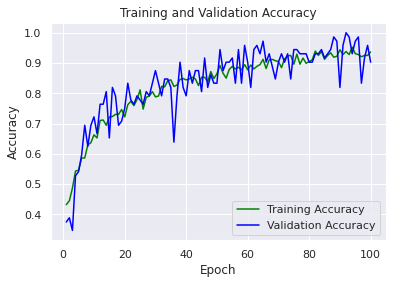

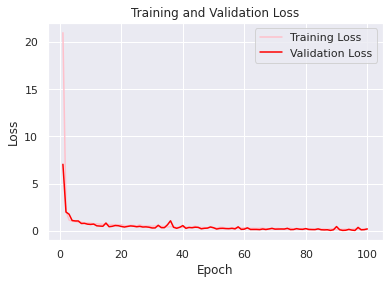

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
"""from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from tensorflow.keras.models import load_model

model = load_model(ModelPath)
predict0 = model.predict_classes(x_test)

Average = 'macro'
Precision = precision_score(y_test, predict0, average = Average)
Recall = recall_score(y_test, predict0, average = Average)
F1Score = f1_score(y_test, predict0, average = Average)
print("\nREPORT")
Report = classification_report(y_true = y_test, y_pred = predict0, target_names = ['Anorganik', 'B3', 'Organik'])
print(Report)
print("\nPrecision =", Precision)
print("Recall =", Recall)
print("F1 Score =", F1Score)"""

'from sklearn.metrics import f1_score, precision_score, recall_score, classification_report\nfrom tensorflow.keras.models import load_model\n\nmodel = load_model(ModelPath)\npredict0 = model.predict_classes(x_test)\n\nAverage = \'macro\'\nPrecision = precision_score(y_test, predict0, average = Average)\nRecall = recall_score(y_test, predict0, average = Average)\nF1Score = f1_score(y_test, predict0, average = Average)\nprint("\nREPORT")\nReport = classification_report(y_true = y_test, y_pred = predict0, target_names = [\'Anorganik\', \'B3\', \'Organik\'])\nprint(Report)\nprint("\nPrecision =", Precision)\nprint("Recall =", Recall)\nprint("F1 Score =", F1Score)'

In [ ]:
model.save("/content/drive/MyDrive/model_save/Proyek_Akhir_100_e_lr001_2.h5")

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/model_save/Proyek_Akhir_100_e_lr001.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Saving 0 (13).jpeg to 0 (13) (1).jpeg
0 (13).jpeg
Ini Ekspresi Marah


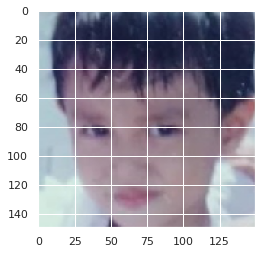

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=16)

  print(fn)

  if classes[0][0] == 1:
    print('Ini Ekspresi Marah')
  elif classes[0][1] == 1:
    print('Ini Ekspresi Biasa Saja')
  elif classes[0][2] == 1:
    print('Ini Ekspresi Senyum')
  else:
    print('Error')